In [730]:
%pip install seaborn 

In [732]:
%pip install geopandas

   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --- ------------------------------------ 1.6/16.2 MB 9.3 MB/s eta 0:00:02
   ------- -------------------------------- 2.9/16.2 MB 7.3 MB/s eta 0:00:02
   ----------- ---------------------------- 4.7/16.2 MB 7.7 MB/s eta 0:00:02
   ---------------- ----------------------- 6.6/16.2 MB 8.0 MB/s eta 0:00:02
   -------------------- ------------------- 8.4/16.2 MB 8.1 MB/s eta 0:00:01
   ------------------------- -------------- 10.2/16.2 MB 8.3 MB/s eta 0:00:01
   --------------------------- ------------ 11.0/16.2 MB 7.9 MB/s eta 0:00:01
   -------------------------------- ------- 13.1/16.2 MB 7.9 MB/s eta 0:00:01
   ------------------------------------ --- 14.9/16.2 MB 8.0 MB/s eta 0:00:01
   ---------------------------------------  16.0/16.2 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 16.2/16.2 MB 7.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/6.3 MB ? eta -:--:--
   -----

In [734]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Spatial Aggregation 

1. Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years?

In [901]:
df = pd.read_csv("C:/Users/Bhuvi/Downloads/hello.csv")
df1 = df.dropna(subset=["PM2.5"])        # df1 has rows with PM2.5 == NaN removed
a = df.loc[df1["PM2.5"].idxmax()]["state"]
print(f"{a} has the highest average PM2.5 concentration across all stations and across all years.")

Delhi has the highest average PM2.5 concentration across all stations and across all years.


2. Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023?


In [828]:
data23 = df1.query("'2023-01-01' <= Timestamp < '2024-01-01'")        # sub-DataFrame with year 2023
a = data23.loc[df1["PM2.5"]>300]
b = a.groupby("state")["PM2.5"].count()
c = b.idxmax()
print(f"{c} had the most days with hazardous PM2.5 levels for the year 2023.")

Delhi had the most days with hazardous PM2.5 levels for the year 2023.


3. Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability)

In [903]:
a = data23.groupby("state")["PM2.5"].var()        # using Variance to measure variability
c = a.idxmax()
print(f"{c} has the highest variability in PM2.5 levels across its monitoring stations in 2023.")

Delhi has the highest variability in PM2.5 levels across its monitoring stations in 2023.


4. Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)?

In [834]:
data20_21 = df1.query("'2020-01-01' <= Timestamp < '2022-01-01'")        # sub-DataFrame with year 2020-21
b = data20_21.groupby("state")["PM2.5"].mean()
c = b.idxmin()
print(f"{c} has the lowest average PM2.5 levels during the Covid period.")

Mizoram has the lowest average PM2.5 levels during the Covid period.


## Temporal Aggregation

1. Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020.

In [836]:
dataAug20 = df1.query("'2020-08-01' <= Timestamp < '2020-09-01'")        # sub-DataFrame with Aug 2020
b = dataAug20["PM2.5"].idxmax()
c = dataAug20.loc[b]["station"]
print(f"{c} recorded the highest value of PM2.5 for the month Aug of 2020.")

Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB recorded the highest value of PM2.5 for the month Aug of 2020.


2. For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others?


In [945]:
data18 = df[df["Timestamp"].dt.year == 2018]
data18 = df_2018[df_2018["station"] == "Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB"]
data18_winter = df_2018[df_2018["Timestamp"].dt.month.isin([12, 1, 2])]
data18_summer = df_2018[df_2018["Timestamp"].dt.month.isin([3, 4, 5])]
data18_monsoon = df_2018[df_2018["Timestamp"].dt.month.isin([6, 7, 8, 9])]

avg_pm_winter = data18_winter["PM2.5"].mean()
avg_pm_summer = data18_summer["PM2.5"].mean()
avg_pm_monsoon = data18_monsoon["PM2.5"].mean()

print(f"{avg_pm_winter} is the average PM2.5 during winter of 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")
print(f"{avg_pm_summer} is the average PM2.5 during summer of 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB" )
print(f"{avg_pm_monsoon}is the average PM2.5 during summer of 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB")

67.4923443634478 is the average PM2.5 during winter of 2018 for Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB
nan
34.42519611317571


3. Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
- Calculate the monthly average PM2.5 for weekdays and weekends separately
- X-axis: Months (January to December).
- Y-axis: Average PM2.5 levels.
- Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


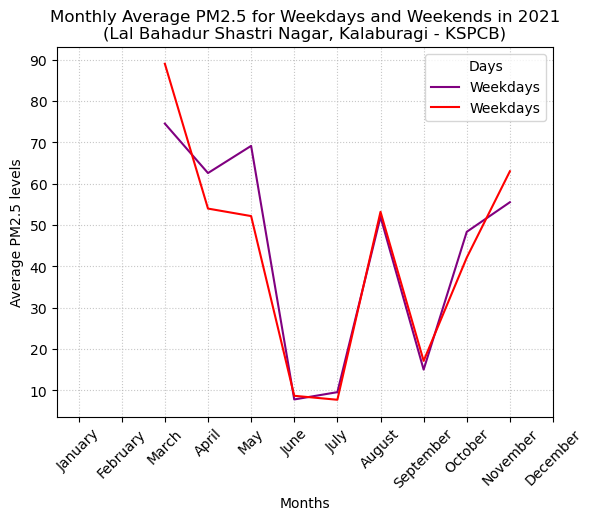

In [840]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"])        # converted Timestamp to Timestamp format
df["Weekday/Weekend"] = df["Timestamp"].dt.day_name()        # added a Day column
df["Month"] = df["Timestamp"].dt.month_name()        # added a Month column

# sub Dataframe with year 2021 and station
data21 = df[df["Timestamp"].between('2021-01-01', '2021-12-31', inclusive="both") & (df["station"]=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB')]
data21_wd = data21.loc[(data21["Weekday/Weekend"] != "Sunday") & (data21["Weekday/Weekend"] != "Saturday")]
data21_we = data21.loc[(data21["Weekday/Weekend"] == "Sunday") | (data21["Weekday/Weekend"] == "Saturday")]

# plotting graph
fig, ax = plt.subplots()
x = pd.Categorical(df["Month"]).unique()
y = data21_wd.groupby("Month")["PM2.5"].mean()
ax.plot(x, y, label="Weekdays", color="purple")

y = data21_we.groupby("Month")["PM2.5"].mean()
ax.plot(x, y, label="Weekdays", color="red")
ax.legend(loc="upper right", title="Days")
ax.set_title("Monthly Average PM2.5 for Weekdays and Weekends in 2021\n(Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB)")
ax.set_xlabel("Months")
ax.set_ylabel("Average PM2.5 levels")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45)
ax.grid(True, alpha=0.7, linestyle="dotted")
plt.show()

## Spatio-temporal aggregation

1. For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022?

In [875]:
# Convert 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract Year and Month
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month

# Filter data for the year 2022
df_2022 = df[df['Year'] == 2022]

# Define summer (March-May) and monsoon (June-September) months
summer_months = [3, 4, 5]
monsoon_months = [6, 7, 8, 9]

# Calculate average PM2.5 levels for each state during summer and monsoon
summer_avg = df_2022[df_2022['Month'].isin(summer_months)].groupby('state')['PM2.5'].mean()
monsoon_avg = df_2022[df_2022['Month'].isin(monsoon_months)].groupby('state')['PM2.5'].mean()

# Combine the two DataFrames
pm25_change = pd.DataFrame({'Summer_Avg': summer_avg, 'Monsoon_Avg': monsoon_avg})

# Calculate percentage change
pm25_change['Percentage_Change'] = ((pm25_change['Monsoon_Avg'] - pm25_change['Summer_Avg']) / pm25_change['Summer_Avg']) * 100

# Find the state with the highest absolute percentage change
most_diff_state = pm25_change['Percentage_Change'].abs().idxmax()
most_diff_value = pm25_change.loc[most_diff_state, 'Percentage_Change']

# Print the results
print("State-wise percentage change in PM2.5 levels (Monsoon vs Summer) for 2022:")
print(pm25_change)

print(f"\nState with the most significant difference: {most_diff_state} ({most_diff_value:.2f}%)")

State-wise percentage change in PM2.5 levels (Monsoon vs Summer) for 2022:
                   Summer_Avg  Monsoon_Avg  Percentage_Change
state                                                        
Andhra Pradesh      30.128540    19.355510         -35.756894
Arunachal Pradesh   32.116292    15.069892         -53.077110
Assam               56.337647    21.872292         -61.176419
Bihar               75.834868    35.642356         -53.000042
Chandigarh          59.695914    32.758585         -45.124242
Chhattisgarh        22.321561    19.871696         -10.975330
Delhi               95.667628    42.769572         -55.293579
Gujarat             65.113078    35.852728         -44.937747
Haryana             81.727661    41.922458         -48.704688
Himachal Pradesh    61.471943    38.686133         -37.067008
Jammu and Kashmir   18.050196    18.049643          -0.003063
Jharkhand                 NaN          NaN                NaN
Karnataka           33.387814    16.527449         -50.49

2. Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels?


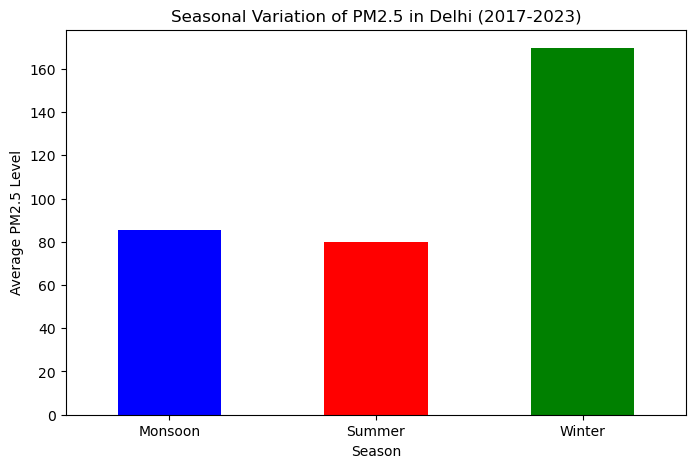

In [877]:
# Convert date column to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Filter for Delhi and relevant years
df = df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year.between(2017, 2023))]

# Define seasons
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    else:
        return "Monsoon"

df["Season"] = df["Timestamp"].dt.month.apply(assign_season)

# Group by season and calculate mean PM2.5
seasonal_pm25 = df.groupby("Season")["PM2.5"].mean()

# Plot results
plt.figure(figsize=(8, 5))
seasonal_pm25.plot(kind="bar", color=["blue", "red", "green"])
plt.xlabel("Season")
plt.ylabel("Average PM2.5 Level")
plt.title("Seasonal Variation of PM2.5 in Delhi (2017-2023)")
plt.xticks(rotation=0)
plt.show()

3. Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2017 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)


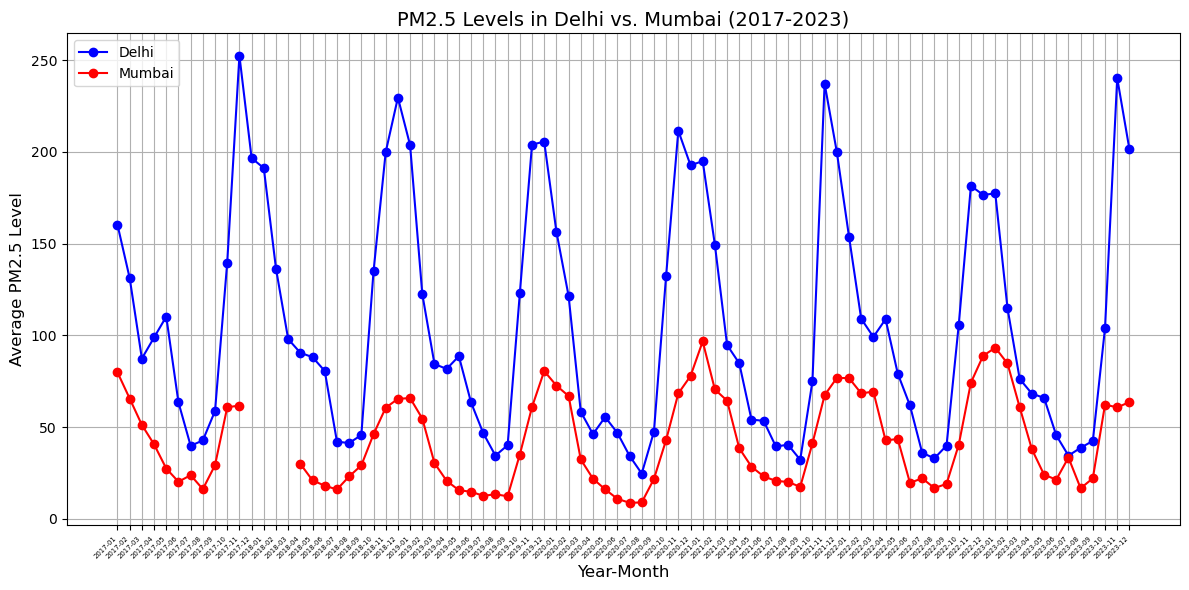

In [872]:
# Convert Timestamp to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Filter for Delhi & Mumbai and the relevant years
df_filtered = df[(df["city"].isin(["Delhi", "Mumbai"])) & (df["Timestamp"].dt.year.between(2017, 2023))].copy()

# Regrouping the data
df_filtered["YearMonth"] = df_filtered["Timestamp"].dt.to_period("M")
monthly_avg_pm25 = df_filtered.groupby(["YearMonth", "city"])["PM2.5"].mean().reset_index()

plt.figure(figsize=(12, 6))
df_delhi = monthly_avg_pm25[monthly_avg_pm25["city"] == "Delhi"]
plt.plot(df_delhi["YearMonth"].astype(str), df_delhi["PM2.5"], label="Delhi", marker="o", linestyle="-", color="blue")
df_mumbai = monthly_avg_pm25[monthly_avg_pm25["city"] == "Mumbai"]
plt.plot(df_mumbai["YearMonth"].astype(str), df_mumbai["PM2.5"], label="Mumbai", marker="o", linestyle="-", color="red")
plt.xlabel("Year-Month", fontsize=12)
plt.ylabel("Average PM2.5 Level", fontsize=12)
plt.title("PM2.5 Levels in Delhi vs. Mumbai (2017-2023)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.xticks(rotation=45, ha="right", fontsize=5)
plt.tight_layout()
plt.show()

Delhi has higher PM2.5 levels all round the year as compared to Mumbai.

## Population Based

1. Which state in India has the highest number of monitoring stations relative to its population? 

In [842]:
sdf = pd.read_csv("C:/Users/Bhuvi/Downloads/State_data.csv")
sdf1 = sdf.sort_values("State").reset_index(drop=True)        # sorting State_data on the basis of state name (alphabetical) (= sdf1)

station_count = df.groupby("state")["station"].count()
stations_PerPerson = station_count/sdf1["Population"]        # new Series formed

highest = ratio_df["station per person"].idxmax()
print(f"{ratio_df.loc[highest,"states"]} has the highest number of monitoring station relative to its population in India.")

Uttar Pradesh has the highest number of monitoring station relative to its population in India.


2. Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


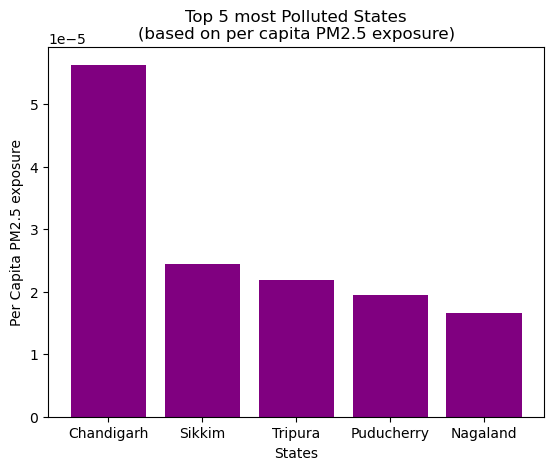

In [844]:
data23 = df1[df1["Timestamp"].between("2023-01-01", "2023-12-31", inclusive="both")]
df_mean_P = data23.groupby("state")["PM2.5"].mean()

# creating DataFrame with the per capita PM2.5 values for each state
PerCapita_P = pd.DataFrame({
    "states": df_mean_P.index,
    "Population": sdf1["Population"],
    "PM2.5": df_mean_P.values
})
PerCapita_P["PerCapita_P"] = PerCapita_P["PM2.5"]/PerCapita_P["Population"]
PerCapita_P = PerCapita_P.sort_values("PerCapita_P", ascending=False)

# plotting graph
fig, ax = plt.subplots()
x = PerCapita_P.head()["states"]
y = PerCapita_P.head()["PerCapita_P"]
ax.bar(x, y, color="purple")
ax.set_title("Top 5 most Polluted States\n(based on per capita PM2.5 exposure)")
ax.set_xlabel("States")
ax.set_ylabel("Per Capita PM2.5 exposure")
plt.show()

3. Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
- X-axis: Population density (people per square kilometer).
- Y-axis: Average PM2.5 concentration.
- Use a scatter plot to show the relationship, where each point represents a state.

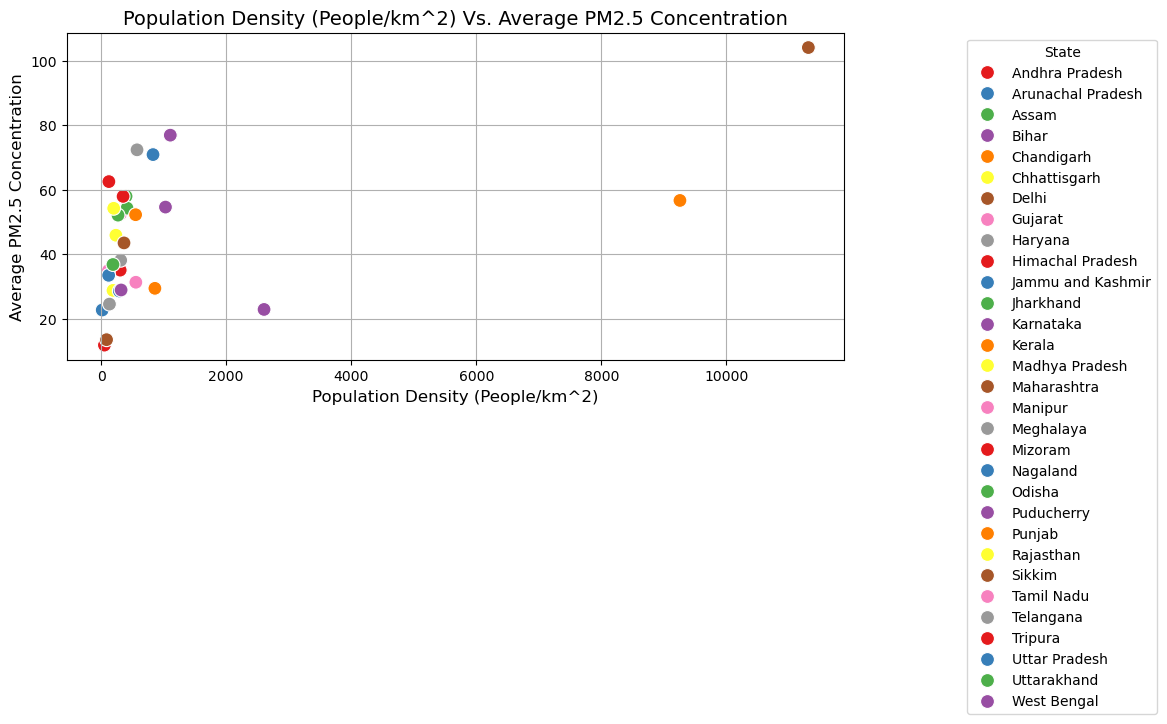

In [925]:
# Calculate Population_density for sdf1
sdf1["Population_density"] = sdf1["Population"] / sdf1["Area (km2)"]

# Group the PM2.5 data by state
y = df1.groupby("state")["PM2.5"].mean().values

data_plot = pd.DataFrame({
    "Population_density": sdf1["Population_density"],
    "PM2.5": y,
    "state": sdf1["State"]
})

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=data_plot, 
    x='Population_density', 
    y='PM2.5', 
    hue='state',          # Color code by state
    s=100,                # Increased size of points
    palette="Set1"        # Color palette for better distinction
)

plt.title("Population Density (People/km^2) Vs. Average PM2.5 Concentration", fontsize=14)
plt.xlabel("Population Density (People/km^2)", fontsize=12)
plt.ylabel("Average PM2.5 Concentration", fontsize=12)
plt.legend(title="State", fontsize=10, bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

## Area Based

1. Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
- X-axis: States.
- Y-axis: PM2.5 concentration per square kilometer.
- Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


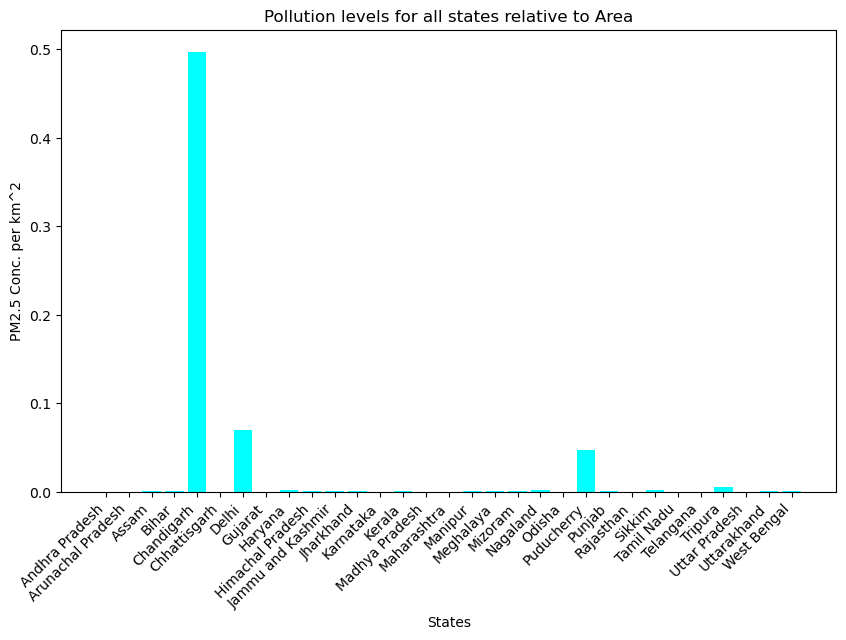

Chandigarh has the highest PM2.5 concentration per square kilometer.


In [846]:
mean_P = df1.groupby("state")["PM2.5"].mean()        # groupby itself sets the data in order acc. to the argument column

conc_perArea = pd.DataFrame({
    "states": mean_P.index,
    "Area": sdf1["Area (km2)"],
    "PM2.5": mean_P.values
})
conc_perArea["Conc. per km^2"] = conc_perArea["PM2.5"]/conc_perArea["Area"]

# plotting graph
fig, ax = plt.subplots(figsize = (10, 6))
x = conc_perArea["states"]
y = conc_perArea["Conc. per km^2"]
ax.bar(x, y, color="cyan")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, ha="right")
ax.set_title("Pollution levels for all states relative to Area")
ax.set_xlabel("States")
ax.set_ylabel("PM2.5 Conc. per km^2")
plt.show()

# state with the highest value
indx = conc_perArea["Conc. per km^2"].idxmax()
print(f"{conc_perArea.loc[indx]['states']} has the highest PM2.5 concentration per square kilometer.")

2. Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.


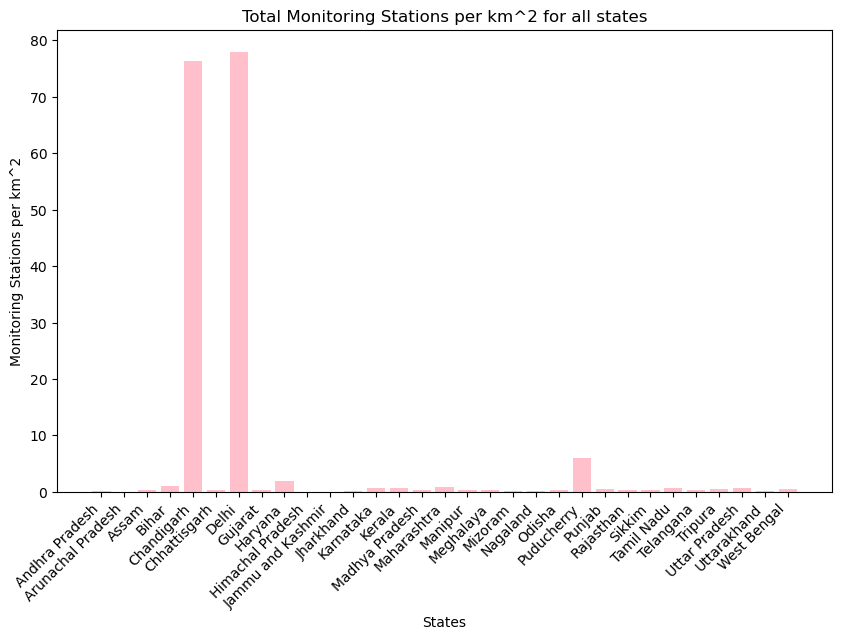

Delhi has the highest number of Monitoring stations per square kilometer.


In [848]:
mean_S = df.groupby("state")["station"].count()

stations_perArea = pd.DataFrame({
    "states": mean_S.index,
    "Area": sdf1["Area (km2)"],
    "Monitoring Stations": mean_S.values
})
stations_perArea["Stations per km^2"] = stations_perArea["Monitoring Stations"]/stations_perArea["Area"]

# plotting graph
fig, ax = plt.subplots(figsize = (10, 6))
x = stations_perArea["states"]
y = stations_perArea["Stations per km^2"]
ax.bar(x, y, color="pink")
ax.set_xticks(x)
ax.set_xticklabels(x, rotation=45, ha="right")
ax.set_title("Total Monitoring Stations per km^2 for all states")
ax.set_xlabel("States")
ax.set_ylabel("Monitoring Stations per km^2")
plt.show()

# state with the highest value
indx = stations_perArea["Stations per km^2"].idxmax()
print(f"{stations_perArea.loc[indx]["states"]} has the highest number of Monitoring stations per square kilometer.")

3. Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.


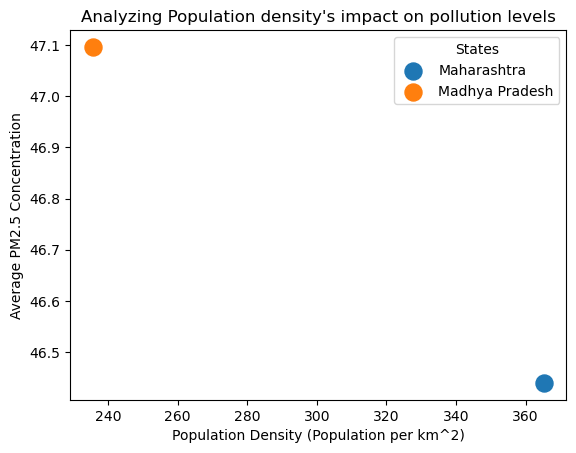

In [860]:
maha = df1[df1["Timestamp"].between("2021-01-01", "2021-12-31", inclusive="both") & (df1["state"] == "Maharashtra")]
mp = df1[df1["Timestamp"].between("2021-01-01", "2021-12-31", inclusive="both") & (df1["state"] == "Madhya Pradesh")]

maha_avg = maha["PM2.5"].mean()
mp_avg = mp["PM2.5"].mean()
maha_pd = sdf1.loc[(sdf1["State"] == "Maharashtra"), "Population"]/sdf1.loc[(sdf1["State"] == "Maharashtra"), "Area (km2)"]
mp_pd = sdf1.loc[(sdf1["State"] == "Madhya Pradesh"), "Population"]/sdf1.loc[(sdf1["State"] == "Madhya Pradesh"), "Area (km2)"]

# plotting scatter plot
fig, ax = plt.subplots()
ax.scatter(maha_pd, maha_avg, label = "Maharashtra", s =150)
ax.scatter(mp_pd, mp_avg, label = "Madhya Pradesh", s = 150)
ax.set_title("Analyzing Population density's impact on pollution levels")
ax.set_xlabel("Population Density (Population per km^2)")
ax.set_ylabel("Average PM2.5 Concentration")
ax.legend(title = "States")
plt.show()

It can be seen that even at lower Population Density, the average PM2.5 is higher that in a state with higher population density, in this case.

## Funding Based

1. Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.

In [852]:
fund = pd.read_csv("C:/Users/Bhuvi/Downloads/NCAP_Funding.csv", delimiter = ',')
fund["Amount released during FY 2021-22"] = pd.to_numeric(fund["Amount released during FY 2021-22"], errors="coerce") 
states_avg = fund.groupby('State')['Amount released during FY 2021-22'].sum()

data_21 = df1.query('"2021-01-01" <= Timestamp < "2022-01-01"')
a = data_21.groupby('state')['PM2.5'].mean()

pd.merge(states_avg, a,right_index = True, left_index = True, how = 'right')

,Amount released during FY 2021-22,PM2.5
state,,
Andhra Pradesh,11.48,33.316491
Arunachal Pradesh,NaN,14.751325
Assam,0.00,61.017780
Bihar,4.40,81.967836
Chandigarh,4.61,44.360885
Chhattisgarh,0.00,24.863968
Delhi,11.25,105.401629
Gujarat,0.00,50.780194
Haryana,NaN,75.320179


The states which received funds have comparatively higher  PM2.5 levels

2. Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?


Average fund released in 2019 is 0.072
Average PM2.5 levels is 55.75277256666265
Average fund released in 2020 is  2.4
Average PM2.5 levels is 62.32940962902694
Average fund released in 2021 is nan
Average PM2.5 levels is 61.017779688632096


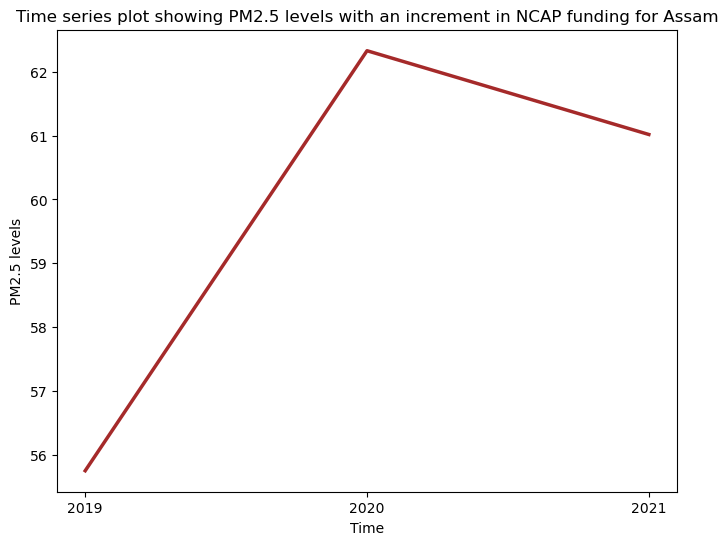

In [857]:
fund["Amount released during FY 2019-20"] = pd.to_numeric(fund["Amount released during FY 2019-20"], errors="coerce") 
states_avg = fund.groupby('State')['Amount released during FY 2019-20'].mean()
print("Average fund released in 2019 is",states_avg.loc['Assam'])
data_19 = df1.query('"2019-01-01" <= Timestamp < "2020-01-01"')
a = data_19.groupby('state')['PM2.5'].mean()
print("Average PM2.5 levels is", a.loc['Assam'])

fund["Amount released during FY 2020-21"] = pd.to_numeric(fund["Amount released during FY 2020-21"], errors="coerce") 
states_avg = fund.groupby('State')['Amount released during FY 2020-21'].mean()
print("Average fund released in 2020 is ",states_avg.loc['Assam'])
data_20 = df1.query('"2020-01-01" <= Timestamp < "2021-01-01"')
b = data_20.groupby('state')['PM2.5'].mean()
print("Average PM2.5 levels is",b.loc['Assam'])

fund["Amount released during FY 2021-22"] = pd.to_numeric(fund["Amount released during FY 2021-22"], errors="coerce") 
states_avg = fund.groupby('State')['Amount released during FY 2021-22'].mean()
print("Average fund released in 2021 is",states_avg.loc['Assam'])
data_21 = df1.query('"2021-01-01" <= Timestamp < "2022-01-01"')
c = data_21.groupby('state')['PM2.5'].mean()
print("Average PM2.5 levels is",c.loc['Assam'])

fig,ax = plt.subplots(figsize=(8, 6))
x = [2019, 2020, 2021]
y = [a.loc['Assam'], b.loc['Assam'], c.loc['Assam']]

ax.plot(x, y, color = 'brown', linestyle = '-', linewidth = 2.5)

ax.set_title("Time series plot showing PM2.5 levels with an increment in NCAP funding for Assam")
ax.set_xlabel("Time")
ax.set_ylabel("PM2.5 levels")
ax.set_xticks(x)
plt.show()

In the year 2021 no fund was released and the PM2.5 level is higher then than the PM2.5 level in 2019 , when the fund was released indicating decrease in air quality level.

3. Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


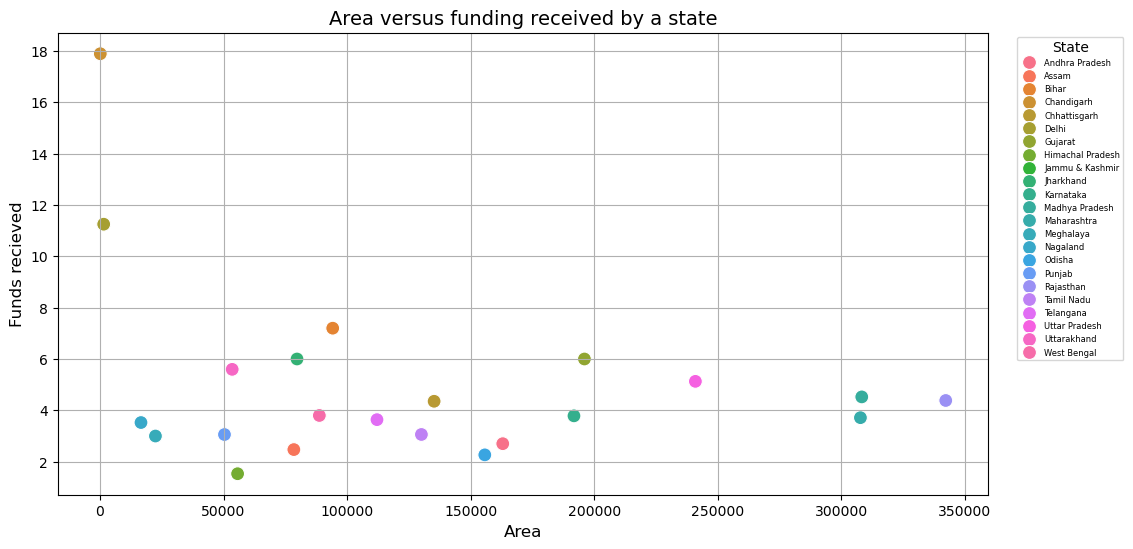

In [863]:
a = fund.groupby('State')['Total fund released'].mean()
b = sdf.loc[::,::2]
data_plot = pd.merge(b, a,on = 'State', how = 'right')

plt.figure(figsize = (12, 6))
sns.scatterplot(
    data = data_plot, 
    x = 'Area (km2)', 
    y = 'Total fund released', 
    hue = 'State', # different colours
    s = 100            #increased size of plots
)
plt.title("Area versus funding received by a state", fontsize = 14)
plt.xlabel("Area", fontsize = 12)
plt.ylabel("Funds recieved", fontsize = 12)
plt.legend(title = "State", fontsize = 6, bbox_to_anchor=(1.15, 1))
plt.grid(True)
plt.show()

## Miscellaneous Questions

1. For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)

In [869]:
a = data23.groupby('city')['PM2.5'].mean()
print(f"The most polluted city in 2023 is {a.idxmax()}.")

data_city = data23.query('city == "Darbhanga"')
mask = data_city['PM2.5'] > 300
reqd_days = data_city[mask]["Timestamp"].count()
per_days = (reqd_days/365)*100
print(f"The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is {per_days}.")

The most polluted city in 2023 is Darbhanga.
The percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³) is 0.821917808219178.


2. Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?

Average PM2.5 during Diwali (2018-2020): 167.63
Average PM2.5 during New Year (2018-2020): 209.32
Average PM2.5 during regular months (2018-2020): 80.45


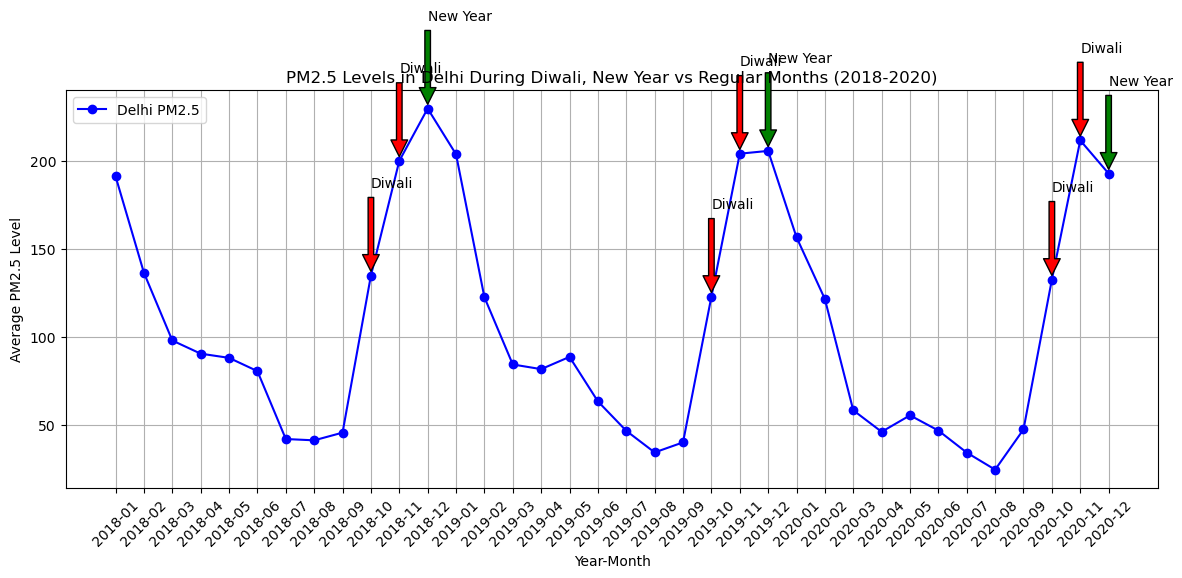

In [883]:
# Convert 'Timestamp' to datetime
df["Timestamp"] = pd.to_datetime(df["Timestamp"])

# Filter for Delhi between 2018 and 2020
df_delhi = df[(df["state"] == "Delhi") & (df["Timestamp"].dt.year.between(2018, 2020))].copy()

# Resample data to monthly averages for smooth trends
df_delhi["YearMonth"] = df_delhi["Timestamp"].dt.to_period("M")
monthly_avg_pm25 = df_delhi.groupby(["YearMonth"])["PM2.5"].mean()

# Define Diwali (October-November) and New Year (December-January) months
diwali_months = ['2018-10', '2018-11', '2019-10', '2019-11', '2020-10', '2020-11']
new_year_months = ['2018-12', '2019-12', '2020-12']

# Calculate average PM2.5 levels for Diwali, New Year, and regular months
diwali_avg = monthly_avg_pm25[monthly_avg_pm25.index.astype(str).isin(diwali_months)].mean()
new_year_avg = monthly_avg_pm25[monthly_avg_pm25.index.astype(str).isin(new_year_months)].mean()
regular_months_avg = monthly_avg_pm25[~monthly_avg_pm25.index.astype(str).isin(diwali_months + new_year_months)].mean()

# Print the average PM2.5 levels
print(f"Average PM2.5 during Diwali (2018-2020): {diwali_avg:.2f}")
print(f"Average PM2.5 during New Year (2018-2020): {new_year_avg:.2f}")
print(f"Average PM2.5 during regular months (2018-2020): {regular_months_avg:.2f}")

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(monthly_avg_pm25.index.astype(str), monthly_avg_pm25, label="Delhi PM2.5", marker="o", linestyle="-", color="blue")

# Mark Diwali and New Year with arrows
for month in diwali_months:
    if month in monthly_avg_pm25.index.astype(str):
        ax.annotate('Diwali', 
                    xy=(month, monthly_avg_pm25[month]), 
                    xytext=(month, monthly_avg_pm25[month] + 50),
                    arrowprops=dict(facecolor='red', shrink=0.05))

for month in new_year_months:
    if month in monthly_avg_pm25.index.astype(str):
        ax.annotate('New Year', 
                    xy=(month, monthly_avg_pm25[month]), 
                    xytext=(month, monthly_avg_pm25[month] + 50),
                    arrowprops=dict(facecolor='green', shrink=0.05))

ax.set_xlabel("Year-Month")
ax.set_ylabel("Average PM2.5 Level")
ax.set_title("PM2.5 Levels in Delhi During Diwali, New Year vs Regular Months (2018-2020)")
ax.legend()
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends

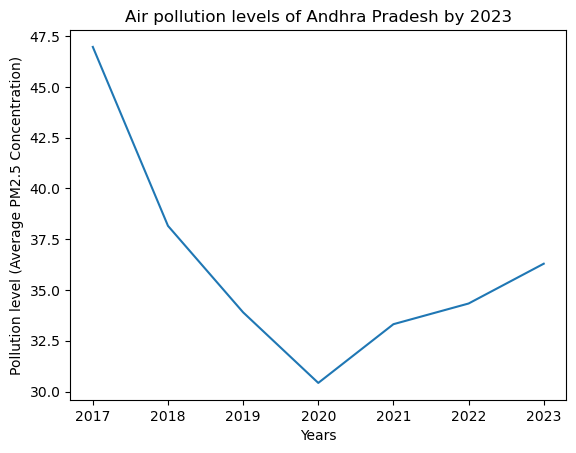

In [899]:
ndf = pd.read_csv("C:/Users/Bhuvi/Downloads/NCAP_Funding.csv")

df1["Timestamp"] = pd.to_datetime(df1["Timestamp"])        

ndf1 = ndf.drop(ndf[ndf["Amount released during FY 2020-21"] == "-"].index)        # removing rows with "-" for 2020
ndf1["Amount released during FY 2020-21"] = ndf1["Amount released during FY 2020-21"].astype(float)        # converting str to float 
ndf_20 = ndf1.groupby("State")["Amount released during FY 2020-21"].sum()

state_highest = ndf_20.idxmax()

state_pm = df1[df1["state"] == state_highest]
state_year = state_pm.groupby(state_pm["Timestamp"].dt.year)["PM2.5"].mean()
state_year = state_year.drop(2024)

# plotting the graph
fig, ax = plt.subplots()
ax.plot(state_year.index, state_year.values)
ax.set_title(f"Air pollution levels of {state_highest} by 2023")
ax.set_xlabel("Years")
ax.set_ylabel("Pollution level (Average PM2.5 Concentration)")
plt.show()

4. Draw the map of India and plot the sensor locations on the map.

In [929]:
%pip install cartopy

Note: you may need to restart the kernel to use updated packages.Collecting cartopy
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------ --------------------------------- 1.8/11.0 MB 9.1 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.0 MB 9.1 MB/s eta 0:00:01
   --------------------- ------------------ 5.8/11.0 MB 9.5 MB/s eta 0:00:01
   ------------------------------- -------- 8.7/11.0 MB 10.7 MB/s eta 0:00:01
   ------------------------------------ --- 10.0/11.0 MB 9.7 MB/s eta 0:00:01
   ---------------------------------------  10.7/11.0 MB 9.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 7.5 MB/s eta 0:00:00



                                   latitude  longitude
station                                               
32Bungalows, Bhilai - CECB        21.194815  81.314770
AIIMS, Raipur - CECB              21.258815  81.578979
Adarsh Nagar, Jaipur - RSPCB      26.902909  75.836858
Airoli, Navi Mumbai - MPCB        19.149400  72.998600
Airport Area, Indore - IMC        22.728900  75.807600
...                                     ...        ...
Worli, Mumbai - MPCB              18.993616  72.812811
Yamunapuram, Bulandshahr - UPPCB  28.406963  77.849831
Yerramukkapalli, Kadapa - APPCB   14.465052  78.824187
Zero Point GICI, Gangtok - SSPCB  27.338530  88.614099
Zoo Park, Hyderabad - TSPCB       17.349694  78.451437

[561 rows x 2 columns]


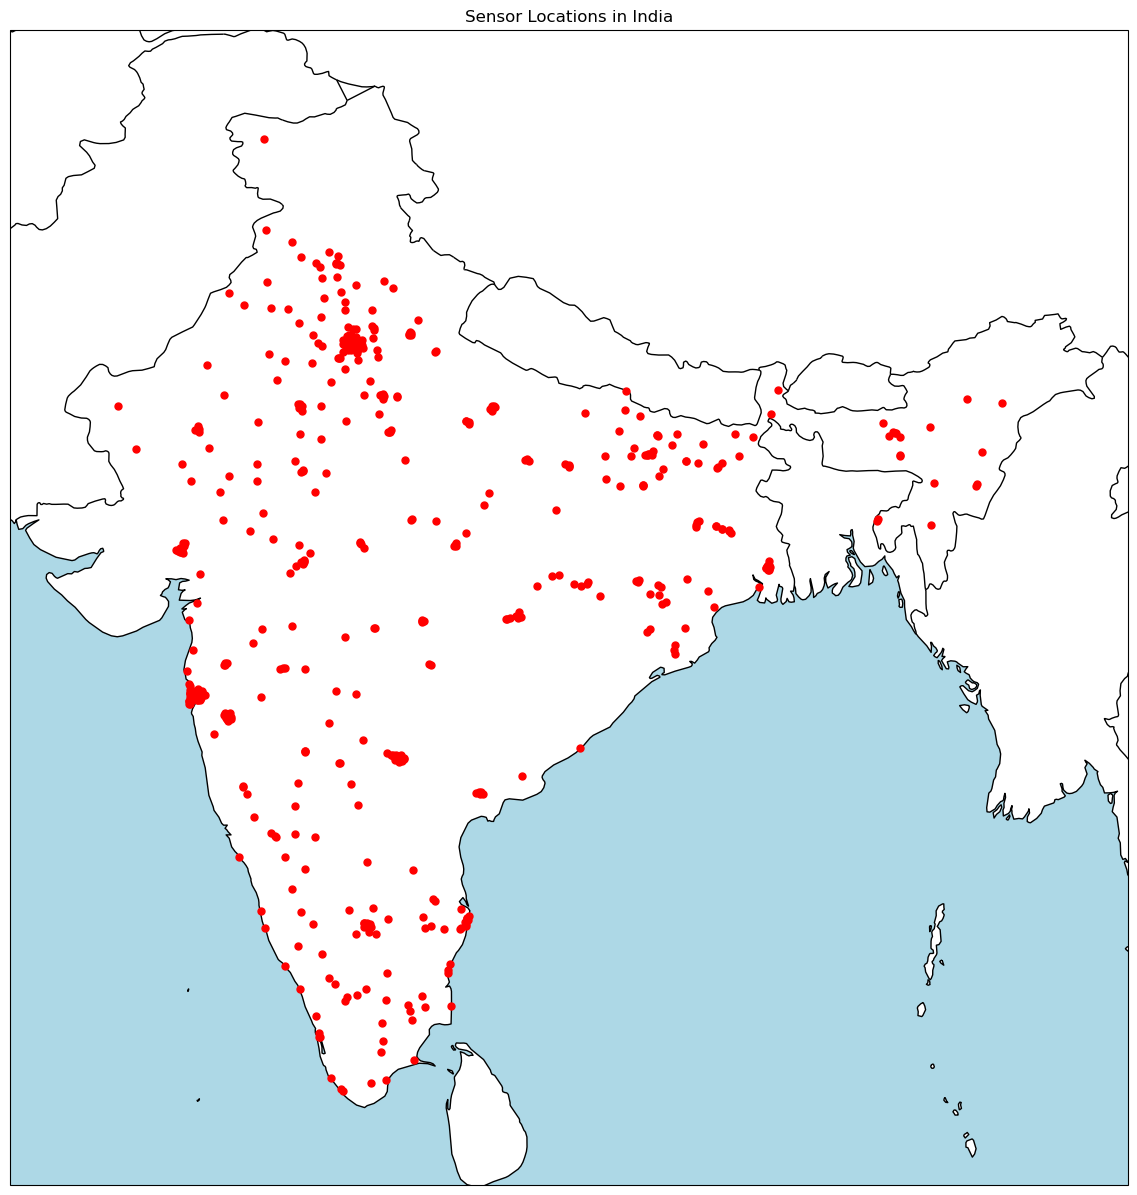

In [936]:
import cartopy 
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Grouping data by station and calculating mean of latitude and longitude
x = df[["latitude", "longitude", "station"]].groupby(["station"]).mean()
print(x)

# Create a map with a specific projection (for India, PlateCarree works well)
fig, ax = plt.subplots(figsize=(15, 15), subplot_kw={'projection': ccrs.PlateCarree()})

ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

# Set extent for the map (India's boundaries)
ax.set_extent([68, 98, 6, 37], crs=ccrs.PlateCarree())  # [min_lon, max_lon, min_lat, max_lat]

# Plot sensor locations
for i in range(len(x)):
    ax.plot(x.iloc[i, 1], x.iloc[i, 0], marker='o', color='red', markersize=5, transform=ccrs.PlateCarree())

ax.set_title('Sensor Locations in India')

plt.show()

## Tell us something new

1. Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. 

- The questions didn't require us to use the data of PM 10.
- Utilization in June 2022 has been given in CAP funding, this will affect PM2.5 values.